In [1]:
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import re

[nltk_data] Downloading package punkt to /home/vatsal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vatsal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vatsal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Read the text and perform Preprocessing on it

### Read the text file

In [1]:
file = open('./sommerville.txt', 'r', encoding='utf-8')
T1 = file.read()

### Preprocessing

In [4]:
# Remove Footer
T1 = re.sub('.* 4/4/06 .*\n', '', T1)
T1 = re.sub('[ ]*••[ ]*••\n', '', T1)

# Remove Header
T1 = re.sub('[0-9]+[ ]+Chapter.*\n', '', T1)
T1 = re.sub('[0-9]+.[0-9]+ ■.*[0-9]+\n', '', T1)
T1 = re.sub('Chapter [0-9]+ ■.*[0-9]+\n', '', T1)

# Remove all heading from the Text
T1 = re.sub(r'\d+(\.\d+)*\.\d+.*\n', '', T1)

# Remove Chapter Title
T1 = re.sub('[0-9]+\n[a-zA-Z ]+\n', '', T1)

# Join broken words
T1 = re.sub(r'-\n\s*', '', T1)

#Removing punctuations
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~■'''
cleantext = ""
for char in T1:
    if char not in punctuations:
        cleantext = cleantext + char

T1 = cleantext

#T1 = re.sub('\W+', '', finalText)
arr = T1.split('\n')

allLines = []

idx = 0

# Remove tables
for i in range(0, len(arr)):
  # Split each line into columns based on spaces
  temp = re.split(r'\s{2,}', arr[i])
  if len(temp) <= 2:
    allLines.insert(idx, temp)
    idx += 1

finalText = ''
for k in allLines: 
  if (len(k) > 1):
    finalText += ' ' + k[1]

In [7]:
#Creating a wordcloud before removing StopWords
wordcloud = WordCloud(stopwords={}, background_color='black').generate(finalText)

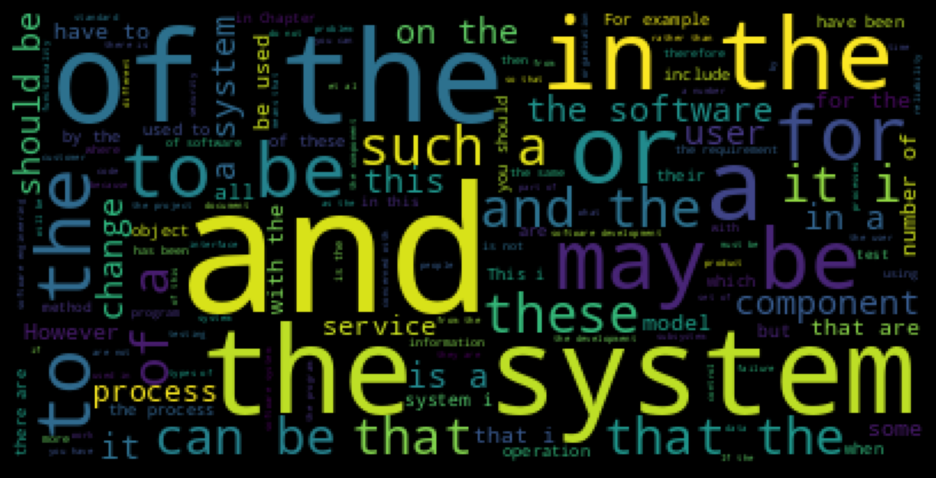

In [8]:
#Plotting the wordcloud
plt.figure(figsize = (10,10), facecolor = 'black') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 3) 
plt.show() 

In [9]:
#Tokenizing the text
tokens = nltk.word_tokenize(finalText)
tokens

['Objectives',
 'The',
 'objectives',
 'of',
 'this',
 'chapter',
 'are',
 'to',
 'introduce',
 'software',
 'engineering',
 'and',
 'to',
 'provide',
 'a',
 'framework',
 'for',
 'understanding',
 'the',
 'rest',
 'of',
 'the',
 'book',
 'When',
 'you',
 'have',
 'read',
 'this',
 'chapter',
 'you',
 'will',
 'understand',
 'what',
 'software',
 'engineering',
 'is',
 'and',
 'why',
 'it',
 'is',
 'important',
 'know',
 'the',
 'answers',
 'to',
 'key',
 'questions',
 'that',
 'provide',
 'an',
 'introduction',
 'to',
 'software',
 'engineering',
 'understand',
 'some',
 'ethical',
 'and',
 'professional',
 'issues',
 'that',
 'are',
 'important',
 'for',
 'software',
 'engineers',
 'Contents',
 'Virtually',
 'all',
 'countries',
 'now',
 'depend',
 'on',
 'complex',
 'computerbased',
 'systems',
 'National',
 'infrastructures',
 'and',
 'utilities',
 'rely',
 'on',
 'computerbased',
 'systems',
 'and',
 'most',
 'electrical',
 'products',
 'include',
 'a',
 'computer',
 'and',
 'cont

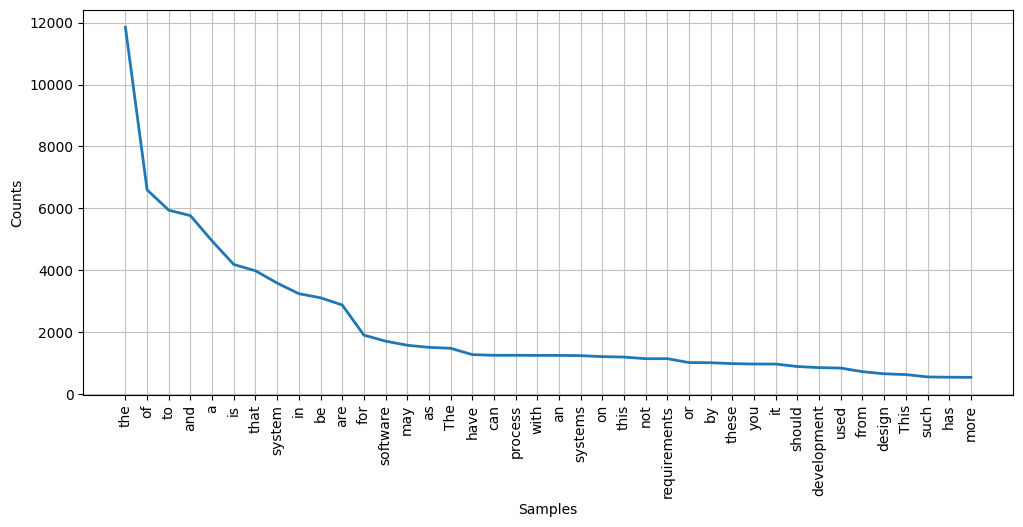

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [10]:
#Plotting Frequency Distribution
tokens = nltk.word_tokenize(finalText)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

In [11]:
#Removing Stopwords
stop_words =set(stopwords.words('english'))
filtered_tokens =[w for w in tokens if w not in stop_words]
tokens = filtered_tokens
finalText = " "
finalText = finalText.join(tokens)

## Generate WordCloud

In [12]:
#Generating wordcloud after removing stopwords
wordcloud = WordCloud(stopwords={}, background_color='black').generate(finalText)

### Plotting WordCloud

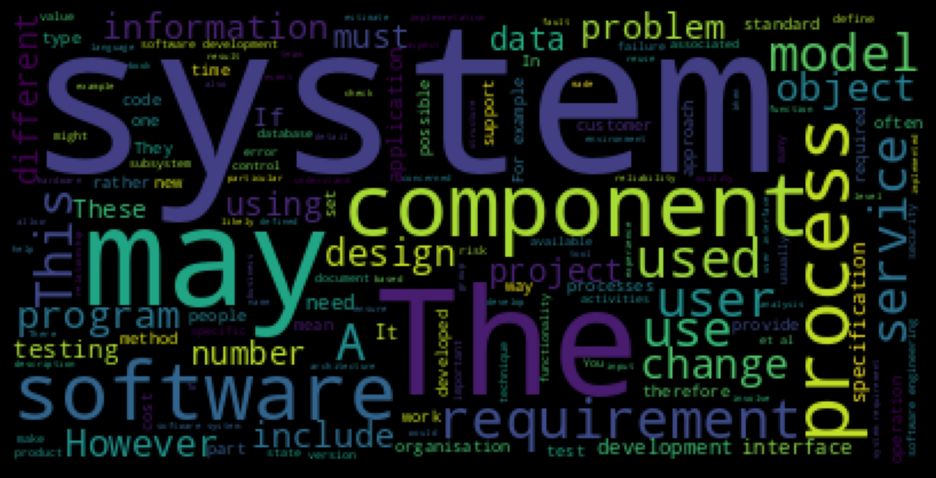

In [13]:
plt.figure(figsize = (10,10), facecolor = 'black') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 3) 
plt.show() 

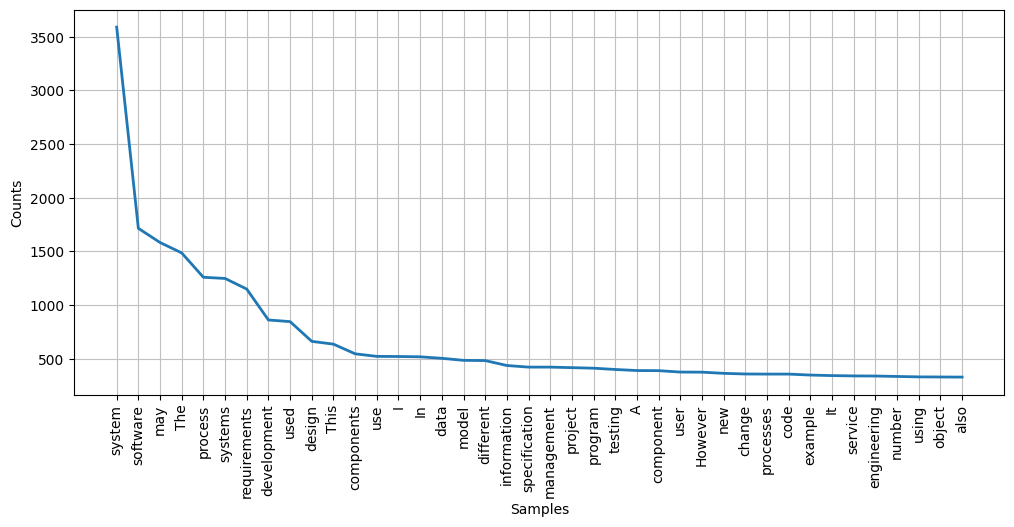

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [14]:
#Plotting Frequency Distribution after removing stopwords
tokens = nltk.word_tokenize(finalText)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

In [ ]:
wordLen = [len(w) for w in tokens]

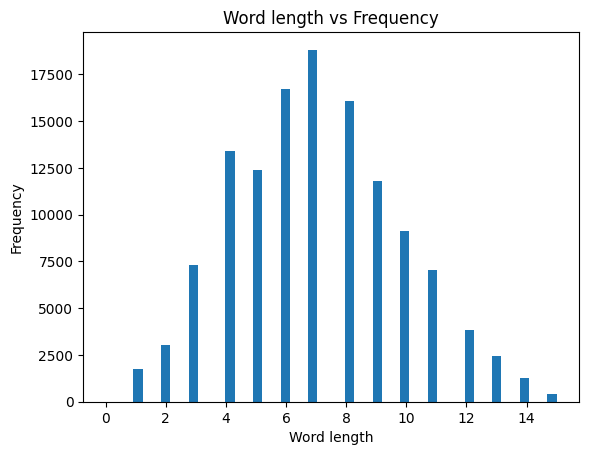

In [ ]:
#Plotting relationship between Word Length and Frequency
plt.hist(wordLen, bins=np.linspace(0,15))

plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.title('Word length vs Frequency')
plt.show()

In [ ]:
#POS Tagging
postTag = nltk.pos_tag(tokens)
postTag

[('Objectives', 'VBZ'),
 ('The', 'DT'),
 ('objectives', 'NNS'),
 ('chapter', 'NN'),
 ('introduce', 'VBP'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('provide', 'NN'),
 ('framework', 'NN'),
 ('understanding', 'VBG'),
 ('rest', 'NN'),
 ('book', 'NN'),
 ('When', 'WRB'),
 ('read', 'JJ'),
 ('chapter', 'NN'),
 ('understand', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('important', 'JJ'),
 ('know', 'VBP'),
 ('answers', 'NNS'),
 ('key', 'JJ'),
 ('questions', 'NNS'),
 ('provide', 'VBP'),
 ('introduction', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('understand', 'JJ'),
 ('ethical', 'JJ'),
 ('professional', 'NN'),
 ('issues', 'NNS'),
 ('important', 'JJ'),
 ('software', 'NN'),
 ('engineers', 'NNS'),
 ('Contents', 'NNP'),
 ('Virtually', 'NNP'),
 ('countries', 'NNS'),
 ('depend', 'VBP'),
 ('complex', 'JJ'),
 ('computerbased', 'VBN'),
 ('systems', 'NNS'),
 ('National', 'NNP'),
 ('infrastructures', 'VBZ'),
 ('utilities', 'NNS'),
 ('rely', 'RB'),
 ('computerbased', 'VBD'),
 ('